In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import plotting          # <--- Just a matplotlib parameters file
from scipy.interpolate import interp1d

In [2]:
def get_dEdx(M, E, Z):
    coeff = 2.32 * 14. / 28.0855 * 0.307
    meev = .511
    gamma = E  / M  + 1 
    beta = np.sqrt(1 - (1 / gamma**2))
    beta2gamma2 = (beta * gamma) **2 
    Tmax = (2 * meev  * beta2gamma2) / (1 + 2 * gamma * meev / M + (meev / M) ** 2)
    I = 10*14.0e-6
    hw = np.sqrt(2.32 * 14 / 28.0855) * 28.816e-6
    ln = np.log((2 * meev * beta2gamma2 * Tmax) / I**2)
    delta_over_2 = np.log(hw / I) + np.log(np.sqrt(beta2gamma2)) - 0.5
    
    return coeff * Z**2 / beta ** 2 * (0.5 * ln - beta ** 2 - delta_over_2)

In [3]:
me = .511
E_array = np.logspace(-2., 9., 5000) 
electron, muon, proton, alpha = [], [], [], []

for E in E_array:
    muon.append(get_dEdx(206.7 * me, E, 1.))
    electron.append(get_dEdx(me, E, 1.))
    proton.append(get_dEdx(1833 * me, E, 1.))
    alpha.append(get_dEdx(7293 * me, E, 2.))


In [4]:
def get_region_near_min(E, curve):
    c = np.asarray(curve)
    miny = np.min(c)
    E_vals_in_range = E[np.where(c < 1.5 * miny)]
    left_bound, right_bound = E_vals_in_range[0], E_vals_in_range[-1]
    
    f = interp1d(E, curve)
    
    left_point = (left_bound, f(left_bound))
    right_point = (right_bound, f(right_bound))
    
    return left_point, right_point


In [5]:
muon_left, muon_right = get_region_near_min(E_array, muon)
electron_left, electron_right = get_region_near_min(E_array, electron)
proton_left, proton_right = get_region_near_min(E_array, proton)
alpha_left, alpha_right = get_region_near_min(E_array, alpha)

muon_bounds = [[muon_left[0], muon_right[0]], [muon_left[1], muon_right[1]]]
electron_bounds = [[electron_left[0], electron_right[0]], [electron_left[1], electron_right[1]]]
proton_bounds = [[proton_left[0], proton_right[0]], [proton_left[1], proton_right[1]]]
alpha_bounds = [[alpha_left[0], alpha_right[0]], [alpha_left[1], alpha_right[1]]]

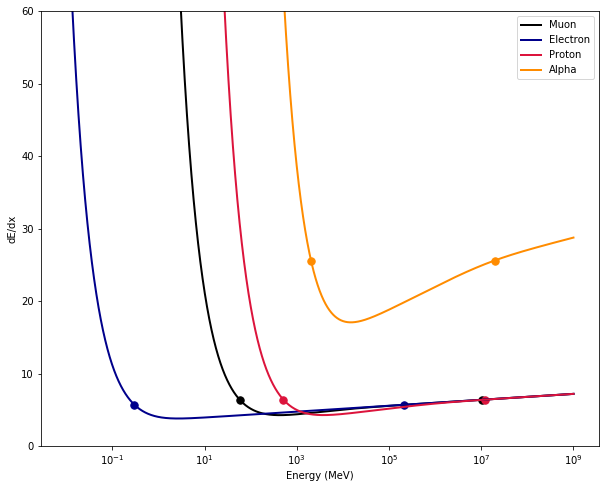

Muon Endpoints		 [57.90986473421715, 10621974.17146741]
Electron Endpoints	 [0.302618991233321, 212552.14550373133]
Proton Endpoints	 [514.2120248998681, 12117601.979063332]
Alpha Endpoints		 [2040.14921416721, 19411433.63726277]


In [6]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.plot(E_array, muon, lw=2, label='Muon', color='black')
ax.plot(E_array, electron, lw=2, label='Electron', color='darkblue')
ax.plot(E_array, proton, lw=2, label='Proton', color='crimson')
ax.plot(E_array, alpha, lw=2, label='Alpha', color='darkorange')

ax.scatter(muon_bounds[0], muon_bounds[1], s=55, color='black')
ax.scatter(electron_bounds[0], electron_bounds[1], s=55, color='darkblue')
ax.scatter(proton_bounds[0], proton_bounds[1], s=55, color='crimson')
ax.scatter(alpha_bounds[0], alpha_bounds[1], s=55, color='darkorange')

ax.set_xscale("log")
ax.set_ylim(0, 60)
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('dE/dx')
ax.legend()
plt.show()

for x, y in zip([muon_bounds, electron_bounds, proton_bounds, alpha_bounds], \
                ['Muon', 'Electron', 'Proton', 'Alpha']):
    if len(y) >= len('Proton'):
        print(y + ' Endpoints\t', x[0])
    else:
        print(y + ' Endpoints\t\t', x[0])